In [63]:
import pandas as pd
import numpy as np
import plotly.express as px

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [67]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<AxesSubplot:title={'center':'Correlation with price'}>

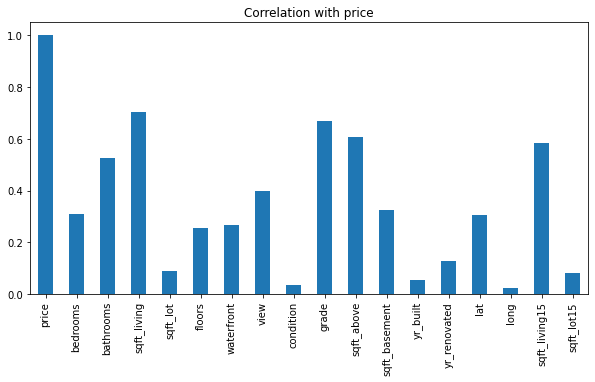

In [68]:
df.corrwith(df['price']).plot.bar(figsize=(10,5), title='Correlation with price')

In [69]:
X = df.drop(['price'], axis=1)
y  = df['price']    

In [70]:
import xgboost as xgb

In [71]:
data_matrix = xgb.DMatrix(X,y)

C:\Users\Admin\miniconda3\envs\env2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [72]:
params = {
    'learning_rate' : .01,
    'max_depth' : 5,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics=['logloss'],
)
results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,-1.989755e+07,7260.993014,-1.989755e+07,14522.989805


In [74]:
results['test-rmse-mean'].plot()

KeyError: 'test-rmse-mean'

grid search

In [ ]:
# grid_params = [
#     (max_depth, learning_rate, alpha)
#     for max_depth in range(5,20,5)
#     for learning_rate in [.01,.1,.5]
#     for alpha in range(0,50,5)
# ]

# min_rmse = float('inf')
# best_params = None

# for max_depth,learning_rate,alpha in grid_params:
#     params = {
#         'max_depth' : max_depth,
#         'learning_rate' : learning_rate,
#         'alpha' : alpha,
#     }
#     results = xgb.cv(
#         params,
#         data_matrix,
#         num_boost_round=500,
#         early_stopping_rounds=5,
#         metrics='rmse',
#     )
#     current_rmse = results['test-rmse-mean'].min()
#     if current_rmse < min_rmse:
#         min_rmse = current_rmse
#         best_params = (max_depth,learning_rate,alpha)
#         print(f'Current best params: {best_params}')

In [ ]:
params

final run

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=1234)

In [ ]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)

In [ ]:
model = xgb.train(
    params,
    train_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    evals=[(test_matrix,'test')],
)
model.save_model('kc_house_model.xgb')

load save model

In [ ]:
saved_model = xgb.Booster()
saved_model.load_model('kc_house_model.xgb')

In [ ]:
X.head(2)

In [ ]:
saved_model.predict(xgb.DMatrix(X.head(2)))

In [ ]:
y[:2]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
f,a = plt.subplots(figsize=(10,15))
xgb.plot_importance(model,ax=a) # tells us which features are important


In [75]:
df['pred']=saved_model.predict(xgb.DMatrix(X))
df.head()

C:\Users\Admin\miniconda3\envs\env2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,pred
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,239808.09375
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,508457.28125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,298014.18750
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,397650.65625
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,515413.71875


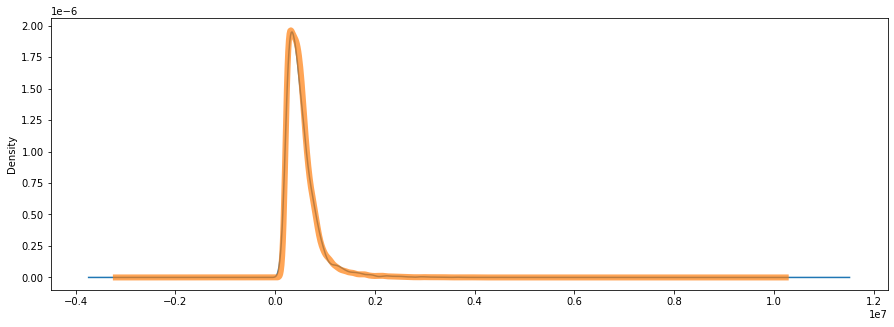

In [79]:
ax = df['price'].plot.kde(label='Actual',figsize=(15,5))
df['pred'].plot.kde(ax=ax,linewidth=6,label='Predicted',alpha=.7)
plt.show()

# flask application to predict house prices using this model